# Resample data and concatenate channels


Here, we show how to resample different continuous data streams to be evenly sampled. We firstly import the necessary libraries and define our recording as well as output directory

In [47]:
from pathlib import Path
from pyneon import NeonRecording, get_sample_data
import matplotlib.pyplot as plt
import numpy as np

# all paths are relative to the location of the notebook
dataset_path = get_sample_data('OfficeWalk')
recording_dir = dataset_path / 'Timeseries Data' /'walk1-e116e606'

test_output_dir = dataset_path
test_output_dir.mkdir(exist_ok=True)




C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data


Next, we will save local instances of the unprocessed data for comparison

In [ ]:
recording = NeonRecording(recording_dir)
raw_gaze_data = recording.gaze.data
raw_eye_states_data = recording.eye_states.data
raw_imu_data = recording.imu.data

Now, we concat the channels with a sampling frequency of 100 Hz. While this downsamples both imu and gaze, it will put them on a common reference frame. Under the hood, continuous values are linearly interpolated, whereas boolean values follow the nearest neighbour.

In [108]:


concat_df = recording.concat_channels(["gaze", "eye_states", 'imu'], sampling_freq=100)
concat_df.to_csv(test_output_dir / "concat_gaze_eye_states.csv", index=False)

Concatenating channels:
	Gaze
	3D eye states
	IMU
Using customized sampling rate: 100 Hz ([])
Using latest start timestamp: 1725032224878547732 (['imu'])
Using earliest last timestamp: 1725032319533909732 (['imu'])


We show an exemplary sampling of eye, imu and concatenated data below. It can be seen that imu data has subsequent missing values which can in turn be interpolated

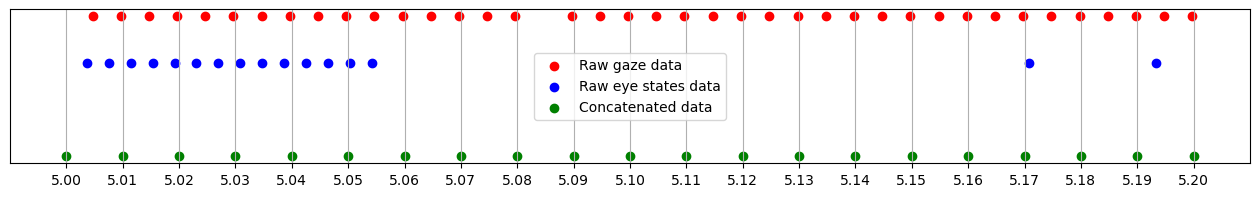

In [109]:


start_time = 5
end_time = 5.2

raw_gaze_interval = raw_gaze_data[(raw_gaze_data['time [s]'] >= start_time) & (raw_gaze_data['time [s]'] <= end_time)]
raw_eye_states_interval = raw_eye_states_data[(raw_eye_states_data['time [s]'] > start_time) & (raw_eye_states_data['time [s]'] <= end_time)]
raw_imu_interval = raw_imu_data[(raw_imu_data['time [s]'] >= start_time) & (raw_imu_data['time [s]'] <= end_time)]
concat_interval = concat_df[(concat_df['time [s]'] >= start_time) & (concat_df['time [s]'] <= end_time)]

# plot all data in the same scatter plot
plt.figure(figsize=(16, 2))
plt.scatter(raw_gaze_interval['time [s]'], np.zeros_like(raw_gaze_interval['time [s]'])+0.5, label='Raw gaze data', color='red')
plt.scatter(raw_imu_interval['time [s]'], np.zeros_like(raw_imu_interval['time [s]']), label='Raw eye states data', color='blue')
plt.scatter(concat_interval['time [s]'], np.zeros_like(concat_interval['time [s]'])-1, label='Concatenated data', color='green')
# set x-ticks with higher frequency and add gridlines
plt.xticks(np.arange(start_time, end_time, 0.01), labels=None)
# remove x labels
# remove y-ticks
plt.yticks([])
plt.grid()
plt.legend()


A linear interpolation allows us to estimate missing values. In the end, the concatenated dataframe combines all continuous data into one central location

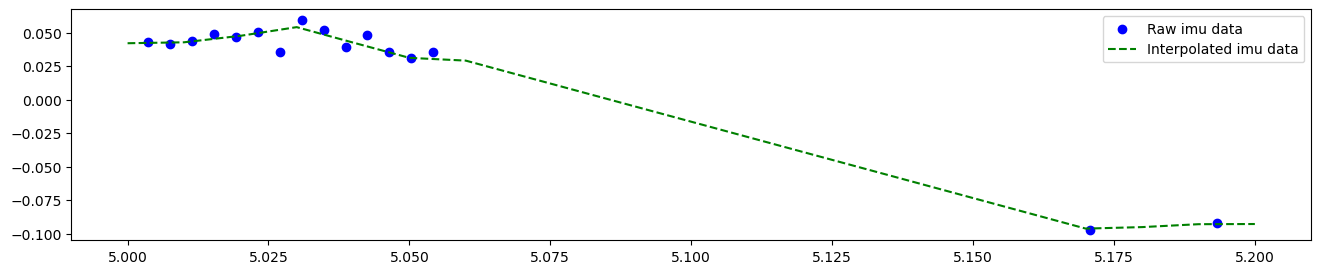

In [110]:
# plot imu data and interpolated data in same plot


plt.figure(figsize=(16, 3))
plt.scatter(raw_imu_interval['time [s]'], raw_imu_interval['acceleration x [g]'], label='Raw imu data', color='blue')
plt.plot(concat_interval['time [s]'], concat_interval['acceleration x [g]'], label='Interpolated imu data', color='green', linestyle='dashed')
plt.legend()
